# TMA4320 Introduksjon til vitenskapelige beregninger - P-04 - løsning
### Beregning av inversfunksjon med Newtons metode


**Problemet.** Vi skal invertere funksjonen $z=f(w)=w\sin w$ på det åpne intervallet $w\in(0,\frac{\pi}{2})$ der denne funksjonen er monotont voksende. Vi søker med andre ord en funksjon $w=g(z)$ som oppfyller ligningen 
$z=g(z)\sin[g(z)]$. Merk at $g(z)$ i utgangspunktet er en flervaluert funksjon, dvs for hver $z$ fins det mange 
verdier $w=g(z)$ som oppfyller ligningen. For eksempel, for $z=0$ vil $g(0)=k\pi$ oppfylle ligningen for alle heltallige $k$. For å få en virkelig funksjon (med kun én verdi for hver $z$) så begrenser vi verdiområdet til $g(z)\in (0,\frac{\pi}{2})$.



**Oppgave 1.** Interpolasjon av den inverse funksjonen $g(z)$.

**(a)** Implementer python-funksjonen *invinterp* som beskrevet i følgende kodecelle, fyll inn din kode i cellen. Som en kontroll på at koden din virker oppgis at med $z=1$, $g_0=\frac{\pi}{3}$, $g_1=\frac{\pi}{2}$ skal man få returnert verdien $1.12118\ldots$.

**Løsning:** Uttrykket for interpolasjonsfunksjonen blir

$$
      Q(z) = \sqrt{\frac{z}{z_0}}\frac{z-z_1}{z_0-z_1}\, g(z_0)\ +\ \sqrt{\frac{z}{z_1}}\frac{z-z_0}{z_1-z_0}\, g(z_1)
$$

**(b)** Lag et plott som viser, for $g_0=\frac{\pi}{3}$, $g_1=\frac{\pi}{2}$, grafen til interpolasjonsfunksjonen $Q(z)$ for $z\in[0,\frac{\pi}{2}]$. Det kan også inkluderes i samme kodecelle nedenfor.

**Ditt svar:** Koden og plottet kodecella

Validering i(a): w=g(1)= 1.1211868645655472 



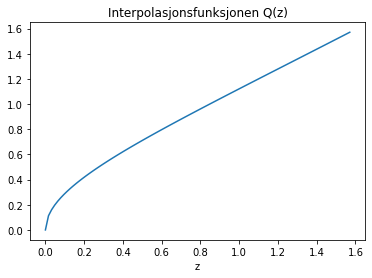

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(w):
    return w*np.sin(w)

def invinterp(z,g0,g1):

    ''' Denne python-funksjonen interpolerer g(z) som beskrevet ovenfor med hensyn på datapunktene
         (z0,g0) og (z1,g1) der 0 < g0 < g1 <= pi/2, z0=f(g0), z1=f(g1), og den returnerer 
         interpolasjonsfunksjonens verdi i z'''
    z0=f(g0)
    z1=f(g1)
    Q = np.sqrt(z/z0)*(z-z1)/(z0-z1)*g0 + np.sqrt(z/z1)*(z-z0)/(z1-z0)*g1
    return Q

#(a) Validering av koden med oppgitt svar
g0, g1 = np.pi/3.0, np.pi/2.0
z=1.0
w=invinterp(z,g0,g1)
print('Validering i(a): w=g(1)=',w,'\n')
#
# (b) plott av funksjonen
npts=100
Z=np.linspace(0,np.pi/2,npts)
W=invinterp(Z,g0,g1)
plt.plot(Z,W)
plt.title('Interpolasjonsfunksjonen Q(z)')
plt.xlabel('z')
plt.show()

**Oppgave 2.** Beregning av funksjonen g(z) til maskin-nøyaktighet med Newtons metode. Den generelle idéen er at du henter startverdi til Newtoniterasjonen fra et kall til *invinterp*. Om du ikke skulle ha fått denne til å virke, så sett $w_0=z$ istedet.

**(a)** Utled Newtoniterasjonsskjemaet for å finne $g(z)$, det vil si å løse $F_z(w)=z-f(w)=0$ som beskrevet i kapitlet om Newtoniterasjon ovenfor.

**Løsning:** Funksjonen vi skal finne nullpunkt i er $F_z(w)=z-f(w)=z-w\sin w$. Da blir $F_z'(w)=-(\sin w+w\cos w)$ og vi setter opp Newtoniterasjonen som

$$
     w_{k+1} = w_k + \frac{z-w_k\sin w_k}{\sin w_k + w_k\cos w_k} = \frac{w_k^2\cos w_k+z}{\sin w_k+w_k\cos w_k}
$$

**(b)** Lag en python-funksjon *invfunc* som beskrevet i kodecellen nedenfor, der du fyller inn din kode. Verifiser ved å kalle den med argumentet
$z=1$. Hva du setter for $w_0$ er ikke så viktig, men prøv f.eks. og $w_0=1$, svaret skal da (uansett $w_0$) bli $g(1)=1.11415\ldots$. Gjør denne testen i koden og skriv også ut antall iterasjoner som ble brukt.

**Løsning:** Se kodecelle nedenfor

**(c)** Lag 3 plott med grafer, i alle er den horisontale aksen $z$ der $0<z\leq\frac{\pi}{2}$ (unngå $z=0$).
1. Grafen til $g(z)$ beregnet fra *invfunc*
2. Grafen til både $g(z)$ og $Q(z)$, sistnevnte beregnet fra *invinterp* i samme plott
3. Grafen til differansen $g(z)-Q(z)$

**Løsning:** Se kodecella nedenfor


Validering i (b), g(1)= 1.1141571408719302
Beregnet med 4 iterasjoner



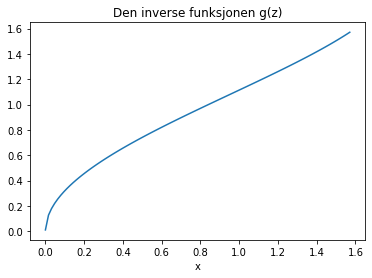

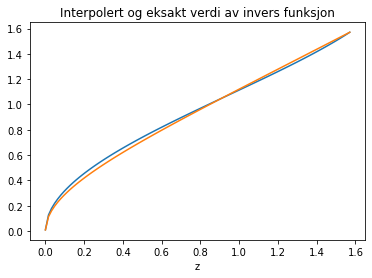

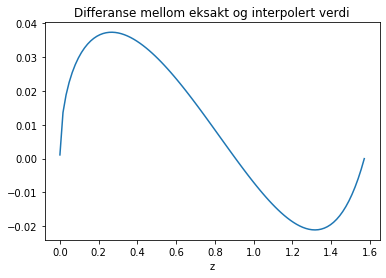

In [2]:


def invfunc(z,w0):
    '''Denne python-funksjonen beregner g(z) for en gitt verdi av z ved Newtoniterasjon.
    Input w0 er startverdien til Newtoniterasjonen (som du gjerne har hentet fra "invinterp")
    Funksjonen itererer til maskin-nøyaktighet som beskrevet under kapitlet Newtoniterasjon.
    Legg også inn en teller (iter) for antall iterasjoner og returner denne sammen med w=g(z)
    f.eks. "return w, iter"
    '''
    w=w0
    tol = 2*np.finfo(float).eps  #avrundingsenheten x 2
    converged=False
    iter=0
    while not converged:
        iter+=1
        w0=w
        w = (w0**2*np.cos(w0)+z)/(np.sin(w0)+w0*np.cos(w0))
        converged = np.abs(w-w0)/np.abs(w) < tol or iter>1000
    return w,iter

# (b) Validering
w, iter=invfunc(1.0,1.0)
print('Validering i (b), g(1)=',w)
print('Beregnet med',iter,'iterasjoner\n')
#
# (c) Plotting
# Først plottet med bare g(z)
npts=100
zstart=1e-4  # unngå z=0
zend = np.pi/2
Z = np.linspace(zstart,zend,npts)
W = np.zeros_like(Z)
for k in range(npts):
    w0=invinterp(Z[k],np.pi/3,np.pi/2)
    W[k],iter=invfunc(Z[k],w0)
plt.plot(Z,W)
plt.title('Den inverse funksjonen g(z)')
plt.xlabel('x')
plt.show()
#
# Så plottet med g(z) og Q(z)
g0,g1=np.pi/3.0,np.pi/2.0
Wi = invinterp(Z,g0,g1)
plt.plot(Z,W,Z,Wi)
plt.title('Interpolert og eksakt verdi av invers funksjon')
plt.xlabel('z')
plt.show()
#
# Til slutt differansen (feil i interpolasjon)
plt.plot(Z,W-Wi)
plt.title('Differanse mellom eksakt og interpolert verdi')
plt.xlabel('z')
plt.show()